In [1]:
RESULTS_ZIP_FILE = "../../results/synthBootstrap/synthBootstrap.zip"
RESULTS_FOLDER_DESTINATION = "../../results/synthBootstrap"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [2]:
RESULTS_FOLDER = "../../results/synthBootstrap/synthBootstrap"

In [3]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

9000

In [5]:
%run ../../utils/postprocessing.py --folder ../../results/synthBootstrap/synthBootstrap --suffix .txt

100%|██████████| 2000/2000 [00:09<00:00, 203.56it/s]


In [7]:
#%run ../../utils/extract_screenshots --folder ../../results/synthBootstrap/synthBootstrap --webGenerator

In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/synthBootstrap/synthBootstrap 

In [4]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [5]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [6]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index
count,1000.00000,1000.000000,1000.000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5610.53300,5783.332000,5852.363,0.929495,443.890000,0.081324,0.951486,3.946000,0.048832,0.783304
std,1979.35669,2119.512022,2158.831,0.079162,668.592008,0.089682,0.052112,6.485919,0.075302,0.109579
min,1787.00000,1771.000000,1787.000,0.358629,23.000000,0.004709,0.523501,0.000000,0.000000,0.292575
25%,4062.00000,4152.500000,4181.000,0.918009,94.000000,0.023448,0.951373,0.000000,0.000000,0.720475
50%,5272.00000,5419.000000,5449.500,0.961995,170.500000,0.041521,0.969018,1.000000,0.018434,0.790066
75%,6884.25000,7037.750000,7144.250,0.976423,478.750000,0.104897,0.977048,5.000000,0.066667,0.847938
max,15082.00000,14089.000000,15082.000,0.993028,6099.000000,0.604775,0.993817,55.000000,0.591549,1.000000


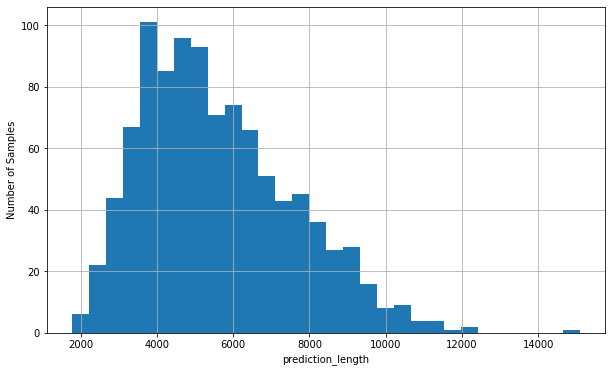

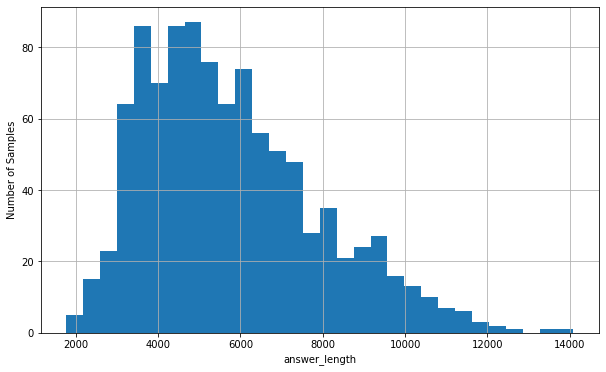

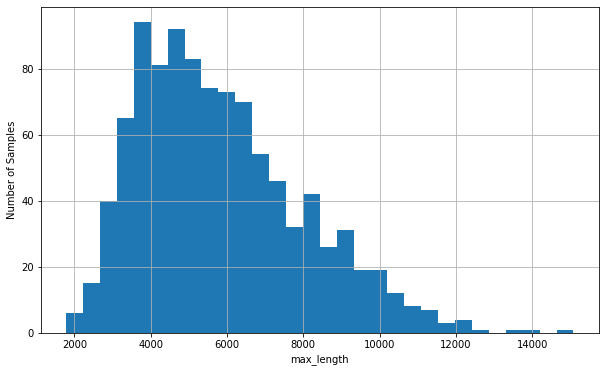

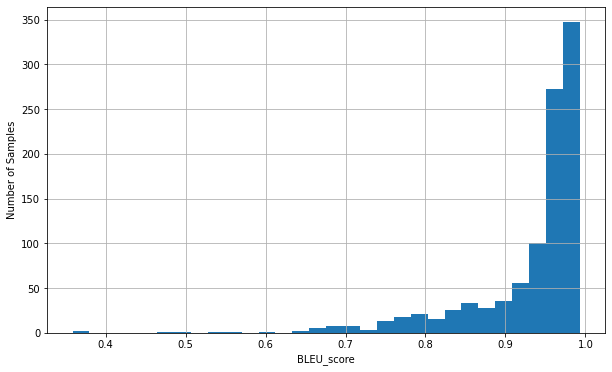

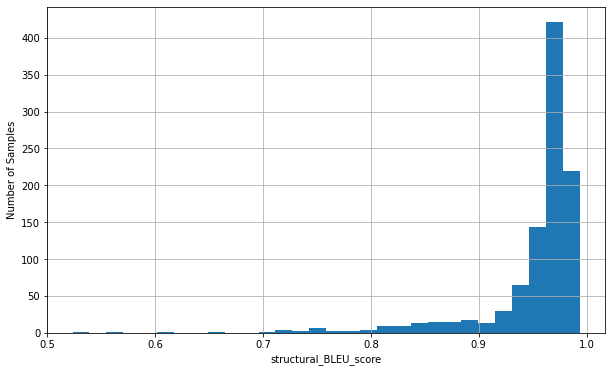

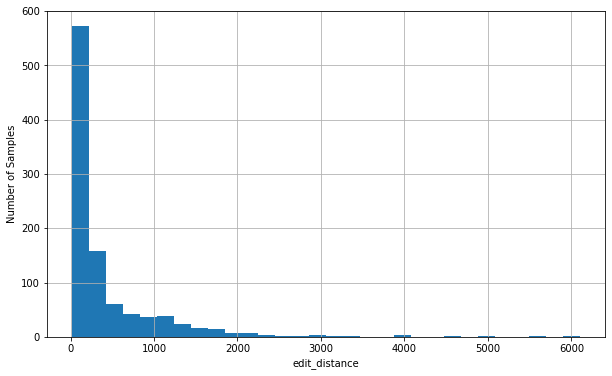

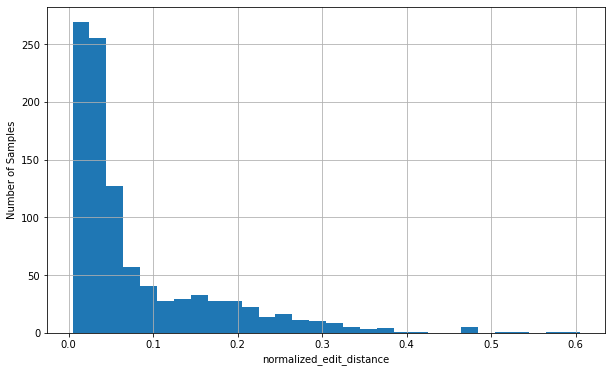

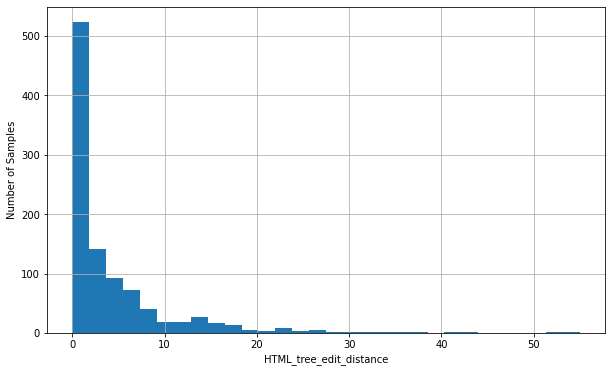

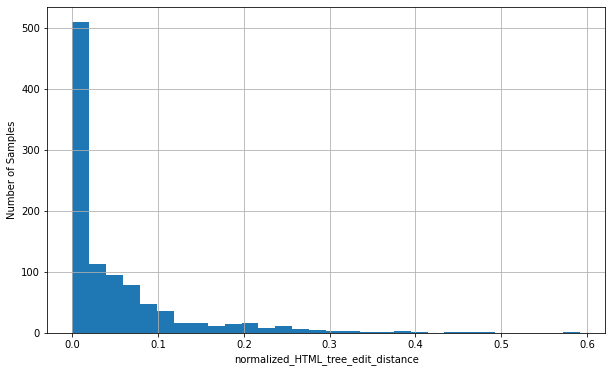

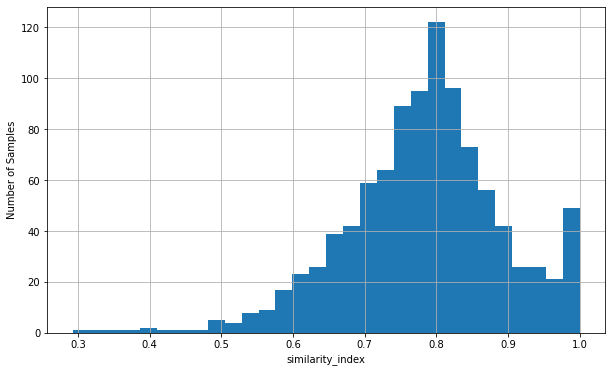

In [14]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


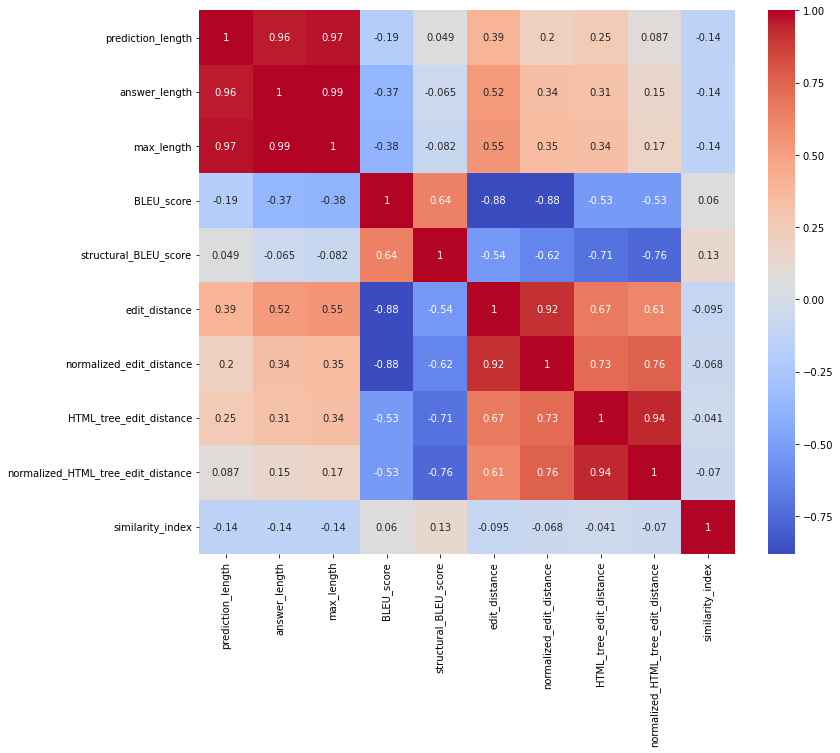

In [19]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
print(correlation_matrix)


                                    prediction_length  answer_length  \
prediction_length                            1.000000       0.959977   
answer_length                                0.959977       1.000000   
max_length                                   0.973725       0.993035   
BLEU_score                                  -0.193656      -0.372314   
structural_BLEU_score                        0.049424      -0.065449   
edit_distance                                0.394323       0.522673   
normalized_edit_distance                     0.203201       0.338090   
HTML_tree_edit_distance                      0.254999       0.309933   
normalized_HTML_tree_edit_distance           0.086856       0.146981   
similarity_index                            -0.144839      -0.138559   

                                    max_length  BLEU_score  \
prediction_length                     0.973725   -0.193656   
answer_length                         0.993035   -0.372314   
max_length           

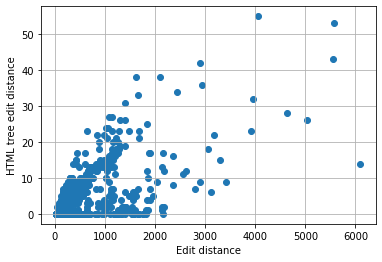

In [10]:
plt.scatter(df["edit_distance"], df["HTML_tree_edit_distance"])
#plt.title("Edit distance vs HTML tree edit distance")
plt.xlabel("Edit distance")
plt.ylabel("HTML tree edit distance")
plt.grid(True)
plt.show()


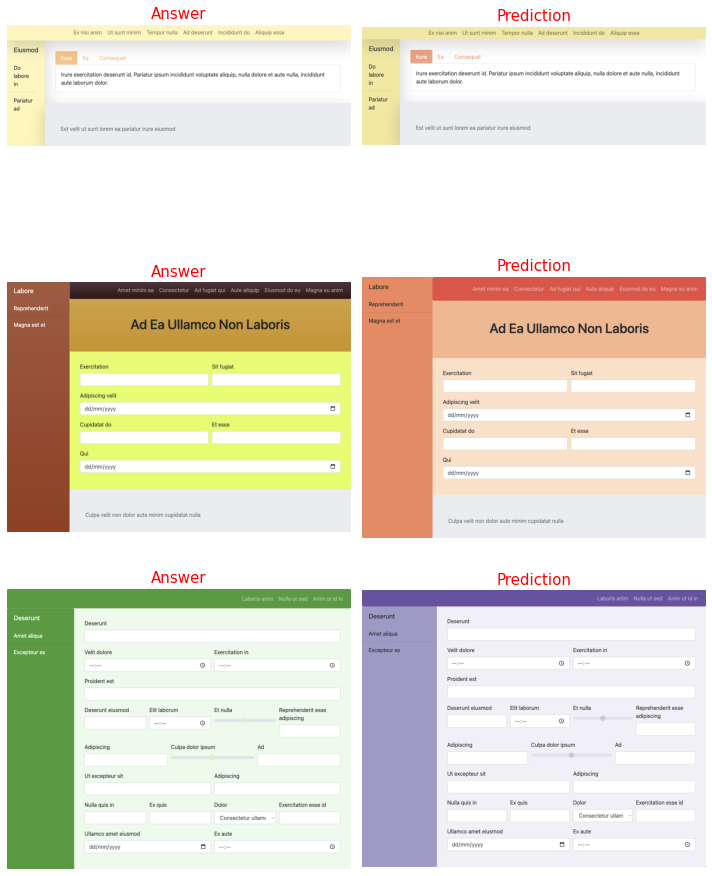

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 3

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*5))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()


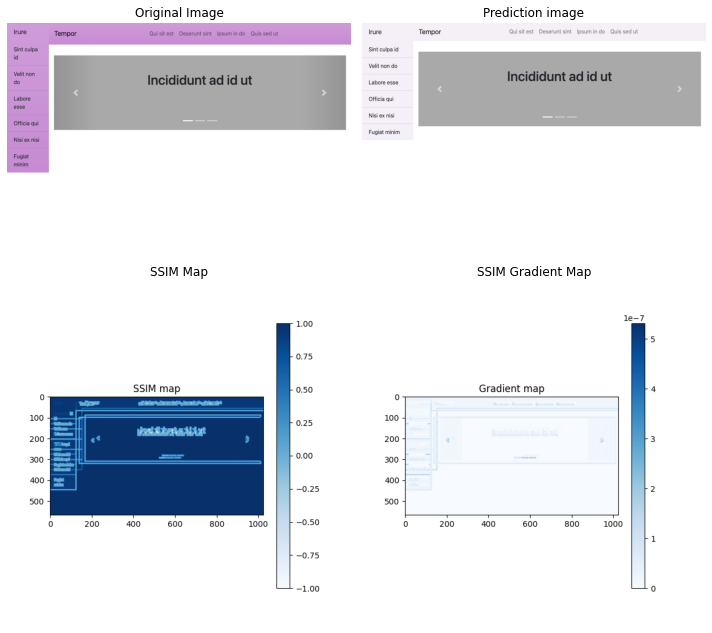

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
FOLDER = "../../results/synthBootstrap/synthBootstrap/"
image_paths = ['rw_105_answer_processed.png', 'rw_105_pred_processed.png', 'rw_105_ssim_map.png', 'rw_105_gradient_map.png']

# Titles for the images
titles = ['Original Image', 'Prediction image', 'SSIM Map', 'SSIM Gradient Map']

# Create a 2x2 grid for displaying images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, img_path, title in zip(axes.ravel(), image_paths, titles):
    img = Image.open(FOLDER + img_path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')  # Hide the axis values

plt.tight_layout()
plt.show()
